<a href="https://colab.research.google.com/github/chewzzz1014/DPhi-Bootcamp/blob/master/notes/deep-learning/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network for Handwritten Digits Classification**
Source : https://youtu.be/iqQgED9vV7k 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [40]:
 # import the dataset from keras library
 # already splited into train and test sets of input var and output var respectively
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

**Exploring Datasets**

In [41]:
# X_train has 60,000 images each with 28x28 pixels
# y_train has the same number of elements (digits predicted) as X_train
# same thing for X_test and y_test
print("Shape of {} : {}".format("X_train", X_train.shape))
print("Shape of {} : {}".format("y_train", y_train.shape))
print("Shape of {} : {}".format("X_test", X_test.shape))
print("Shape of {} : {}".format("y_test", y_test.shape))

Shape of X_train : (60000, 28, 28)
Shape of y_train : (60000,)
Shape of X_test : (10000, 28, 28)
Shape of y_test : (10000,)


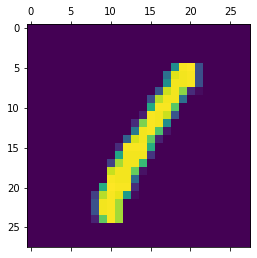

In [42]:
# visualize digit using matplotlib
plt.matshow(X_train[3])

In [43]:
# check whether the prediction of the image above is correct
print(y_train[3])

1


**Scaling on Input Varibles**
- Pixels have the range of [0, 255]. To convert them to have the range of [0, 1], divide them by 255.
- Purpose of doing so is to incearse the accuracy of prediction. 

In [44]:
X_train = X_train / 255
X_test = X_test /255

In [45]:
# check how the 3-d array looked like

# first image
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Flatten Input Varible Array (X_train and X_test)**
- Compress the 28x28 pixels into single dimensional array. Thus the flatten array will become 2 Dimensional (from 3 dimensional)

In [46]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

print("Shape of X_train after flatten:", X_train_flatten.shape)
print("Shape of X_test after flatten:", X_test_flatten.shape)

Shape of X_train after flatten: (60000, 784)
Shape of X_test after flatten: (10000, 784)


In [47]:
# check how the 2-d array looked like

# first image
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Build Neural Network Model**
Architecture: 
 - `Output Layer` : 10 neurons represent 10 digits respectively. Use `sigmoid function` as the activation function for `Logistic Regression`

In [48]:
model = keras.Sequential([
    # output layer (10 neurons represent 10 digits repectively)
    # sigmoid function as activation function
    keras.layers.Dense (10, input_shape = (28*28,), activation="sigmoid")        
])

**Compile the Model**

In [49]:
model.compile(
    optimizer = "adam", # optimizer function
    loss = "sparse_categorical_crossentropy",  # loss function
    metrics = ["accuracy"]   # we want more accurate model
)

**Train Model**
- `epochs` is the number of iteration the neural network is going to run 

In [50]:
model.fit(X_train_flatten, y_train, epochs = 5 )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9262


**Evaluate the Model**

In [51]:
model.evaluate(X_test_flatten, y_test) 

313/313 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.9248


[0.2682053744792938, 0.9247999787330627]

**Make Prediction**

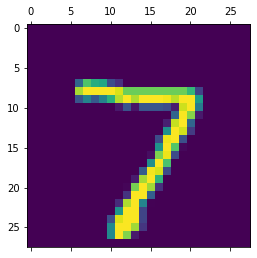

In [54]:
plt.matshow(X_test[0])

In [59]:
prediction = model.predict(X_test_flatten)

# prediction score for each digits, from 0 to 10
# the predicted value is the one with highest score
prediction[0]

array([2.3761451e-02, 7.9413610e-07, 7.0993543e-02, 9.6479660e-01,
       2.6490092e-03, 1.3050735e-01, 1.6697265e-06, 9.9979484e-01,
       6.9907308e-02, 6.5524530e-01], dtype=float32)

In [60]:
# get the index of max value in a np array

# 7 is the predicted digit
np.argmax(prediction[0])

7

In [65]:
# compare between real data and prediction

# since our prediction is in the form of array with predicted score for digit 0-9,
# convert the array into sing le digit only
prediction_label = [ np.argmax(i) for i in prediction]

cm = tf.math.confusion_matrix(labels=y_test, predictions=prediction_label)

Text(69.0, 0.5, 'Actual')

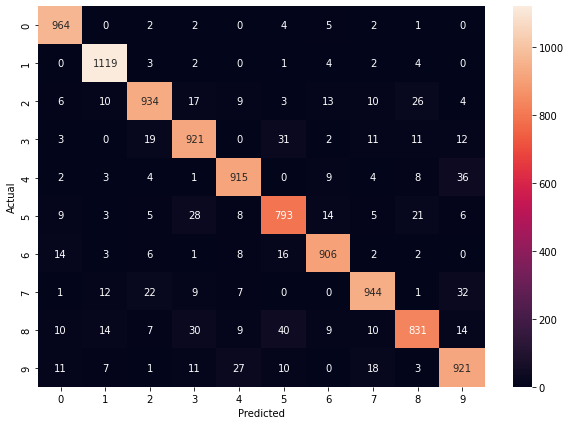

In [68]:
# visualize the confusion matrix
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.heatmap(cm, annot = True, fmt = "d")

plt.xlabel("Predicted")
plt.ylabel("Actual")